### query interfaces

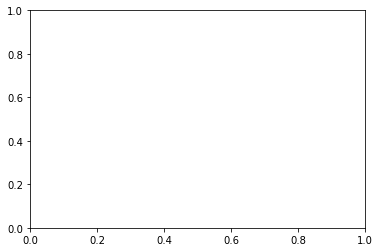

In [72]:
fig,ax = plt.subplots(1)
fig.show()

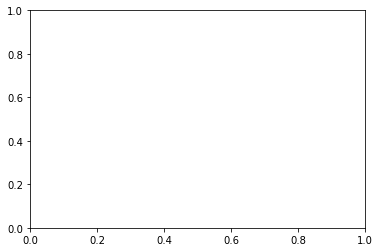

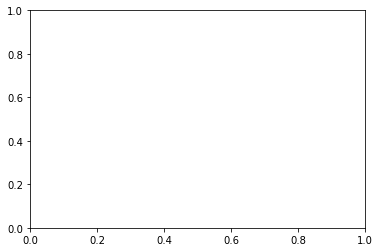

In [73]:
%matplotlib inline
from IPython.display import display
import socket
import ipywidgets as widgets
import matplotlib.pyplot as plt

clients = dict()
sample_count_labels = dict()
status_labels = dict()
milliseconds_label = widgets.Label(value="0", layout=widgets.Layout(width="100%"))
clients["charlie"] = None
clients["delta"] = None
rate = "g"
range = "b"

def build_export_panel():
    global clients
    export_text = widgets.Text(
        value="accelerometer.csv"
    )
    export_button = widgets.Button(
        description="Export"
    )
    preview_button = widgets.Button(
        description="Preview"
    )
    def preview_click(b):
        fig,ax = plt.subplots(1)
        fig.show()
        
    preview_button.on_click(preview_click)
    left = widgets.VBox([widgets.Label(value="Filename"), widgets.Label()])
    middle = widgets.VBox([export_text, widgets.Label()])
    right = widgets.VBox([export_button, preview_button])
    export_panel = widgets.HBox([left, middle, right])
    return export_panel
    
def build_status_panel():
    global clients
    global sample_count_labels
    start = widgets.Button(
        description="Start"
    )
    stop = widgets.Button(
        description="Stop"
    )
    col1_children = [ start, stop, widgets.Label() ]
    col2_children = [ widgets.Label() ] * 3
    col3_children = [ widgets.Label(value="Milliseconds", layout=widgets.Layout(width="100%")), widgets.Label(), widgets.Label(value="Status") ]
    col4_children = [ milliseconds_label, widgets.Label(), widgets.Label("Samples")]
    for accel in clients.keys():
        col2_children.append(widgets.Label(value=accel))
        status_labels[accel] = widgets.Label(
            value="CONNECTED",
            layout=widgets.Layout(width="100%")
        )
        col3_children.append(status_labels[accel])
        sample_count_labels[accel] = widgets.Label(
            value="0"
        )
        col4_children.append(sample_count_labels[accel])
    status_panel = widgets.HBox([widgets.VBox(col1_children), widgets.VBox(col2_children), \
                                 widgets.VBox(col3_children), widgets.VBox(col4_children)])
    return status_panel

def build_settings_panel():
    def get_new_value(change):
        if change['type'] == 'change' and change['name'] == 'value':
            return change['new']
        else:
            return None
        
    def rate_setting_change(change):
        global rate
        val = get_new_value(change)
        if val:
            rate = val
            
    def range_setting_change():
        global range
        val = get_new_value(change)
        if val:
            range = val
    
    rate_setting = widgets.Dropdown(
        options = list(zip(["1 Hz", "10 Hz", "25 Hz", "50 Hz", "100 Hz", "200 Hz", "400 Hz"], ["a", "b", "c", "d", "e", "f", "g"])),
        value = "g"
    )
    rate_setting.observe(rate_setting_change)
    range_setting = widgets.Dropdown(
        options = list(zip(["2 G", "4 G", "8 G", "16 G"], ["a", "b", "c", "d"])),
        value = "b"
    )
    labels = [widgets.Label(value=x) for x in ["Rate", "Range"]]
    settings = [rate_setting, range_setting]
    label_box = widgets.VBox(labels)
    settings_box = widgets.VBox(settings)
    config_options = widgets.HBox([label_box, settings_box])
    return config_options

def cpanel():
    main_tabs = widgets.Tab()
    main_tabs.children = [ build_status_panel(), build_export_panel(), build_settings_panel() ]
    main_tabs.set_title(0, "Collect Data")
    main_tabs.set_title(1, "Export Data")
    main_tabs.set_title(2, "Settings")
    display(main_tabs)

cpanel()


In [67]:
def configure():
    ipmaybe = ([l for l in ([ip for ip in socket.gethostbyname_ex(socket.gethostname())[2] if not ip.startswith("127.")][:1], [
             [(s.connect(('8.8.8.8', 53)), s.getsockname()[0], s.close()) for s in
              [socket.socket(socket.AF_INET, socket.SOCK_DGRAM)]][0][1]]) if l][0][0])
    interfaces = widgets.Dropdown(
        options = [ipmaybe] if type(ipmaybe) is str else ipmaybe,
        value = ipmaybe if type(ipmaybe) is str else ipmaybe[0],
    )
    cport = widgets.Text(
        value='9999',
        placeholder='Control Port',
        disabled=False
    )
    dport = widgets.Text(
        value='9998',
        placeholder='Data Port',
        disabled=False
    )
    server_id = widgets.Text(
        value='codetacc',
        placeholder='Station ID',
        disabled=False
    )
    header = widgets.Label(
        value='Configure your server',
        layout=widgets.Layout(width='100%')
    )
    go = widgets.Button(
        description='Start server',
        layout=widgets.Layout(width="100%")
    )
    
    left_box = widgets.VBox([ widgets.Label(value=x, disabled=True) for x in ["Interface", "Control Port", "Data Port", "Station ID", ""] ])
    right_box = widgets.VBox([interfaces, cport, dport, server_id, go])
    settings_box = widgets.HBox([left_box, right_box])
    settings_panel = widgets.VBox([header, settings_box])
    def start_clicked(b):
        settings_panel.close()
        cpanel()
    go.on_click(start_clicked)
    display(settings_panel)

configure()